#Install Libraries

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=0610108303441b84e1c5bddbef9e81aaaf2946a0459bb8a2051b59534b66ffc9
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
#Import utility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import data import libraries
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import pandas_ta as pta

#Import data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Import DL libraries
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN, Dropout,Bidirectional, Input, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
base_stock = "HDFCBANK.NS"
test_stock = "ICICIBANK.NS"

#Import Data

In [ ]:
df = pdr.get_data_yahoo(base_stock, start="1980-02-01", end="2022-07-13")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030,3.030000,2.925000,2.980000,2.389957,350000
1996-01-02,2.980,3.025000,2.950000,2.975000,2.385947,412000
1996-01-03,2.975,2.995000,2.950000,2.985000,2.393967,284000
1996-01-04,2.985,2.980000,2.940000,2.965000,2.377928,282000
1996-01-05,2.965,2.980000,2.950000,2.960000,2.373918,189000
...,...,...,...,...,...,...
2022-07-06,1348.000,1373.400024,1347.099976,1371.250000,1371.250000,7524539
2022-07-07,1380.000,1398.000000,1374.449951,1395.800049,1395.800049,8871571
2022-07-08,1410.000,1410.000000,1394.750000,1397.099976,1397.099976,6237015


In [ ]:
# company_arr = ['RELIANCE.NS', 'POWERGRID.NS', 'LT.NS', 'DMART.NS', 'TATASTEEL.NS', 'HDFC.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'MARUTI.NS', 'ONGC.NS', 'VEDL.NS', 'UPL.NS', 'DABUR.NS', 'YESBANK.NS']

# for company in company_arr:
#   df = pdr.get_data_yahoo(company , start="1980-02-01", end="2022-07-13")
#   print("inside ", company, " shape: ", df.shape)
#   buy = 0
#   sell = 0

#   for i in range(0, df.shape[0]-1):
#     if df.iloc[i+1][0] >= df.iloc[i][3]:
#       buy += 1
#     else:
#       sell += 1

#   print("buy sell for company: ", company, "is: ",buy, sell, buy*100/(buy+sell))

In [ ]:
df['diff'] = (df['Close'] - df['Open'])*100/df['Open']
df

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
1996-01-01,3.030,3.030000,2.925000,2.980000,2.389957,350000,-1.650163
1996-01-02,2.980,3.025000,2.950000,2.975000,2.385947,412000,-0.167789
1996-01-03,2.975,2.995000,2.950000,2.985000,2.393967,284000,0.336134
1996-01-04,2.985,2.980000,2.940000,2.965000,2.377928,282000,-0.670016
1996-01-05,2.965,2.980000,2.950000,2.960000,2.373918,189000,-0.168630
...,...,...,...,...,...,...,...
2022-07-06,1348.000,1373.400024,1347.099976,1371.250000,1371.250000,7524539,1.724777
2022-07-07,1380.000,1398.000000,1374.449951,1395.800049,1395.800049,8871571,1.144931
2022-07-08,1410.000,1410.000000,1394.750000,1397.099976,1397.099976,6237015,-0.914895


#Feature Selection

##What aer the different features we can use, keep in mind we want to solve the problem of scaling and predict tomorrow's price

**So what is the problem with scaling using minmaxscaler or standard scaler on general problems? **

-> If we fit the scaler on Nifty data which ranges from (4000 to 11000), the newer stock values when transformed will have very low values (less pattern similarity corresponding to only 20% of initial training dataset).


**What if we use different scalers?**

-> Even if we use different scalers,

  -> There is a problem of data not being normalized. The patterns in the chart will range from 0-0.3 (for first 20% data) and so on, be divided into brackets.

**So we conclude we need to normalize the data. As we are only using univariate feature, what do you propose? **

-> I propose 2 solutions,
  
  -> Create batches using unscaled data. Then scale the data on the individual batches. Handling only a single feature makes this task simpler as we can create batches with the targets, scale them, and then seperate them. We have 2 options for scaling, 1 would be use a standard scaler but in that case, we would have to store all the scalers (equal to the number of batches). What we can do instead is scale it ourselves using mean and std dv and store these values in a dictionary against batch number so original value can be retrieved after transformation. I will try the standardscaling function to check the mse, in my opinion it should perform better and give a lower mse value.

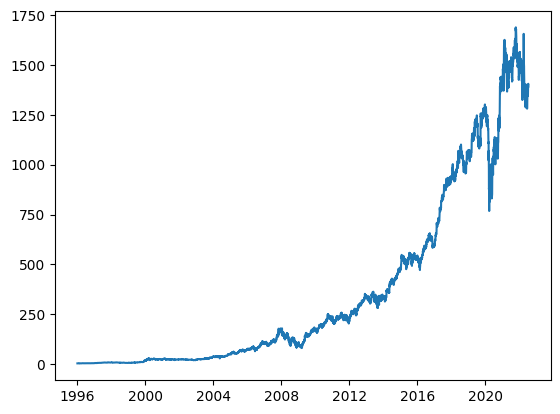

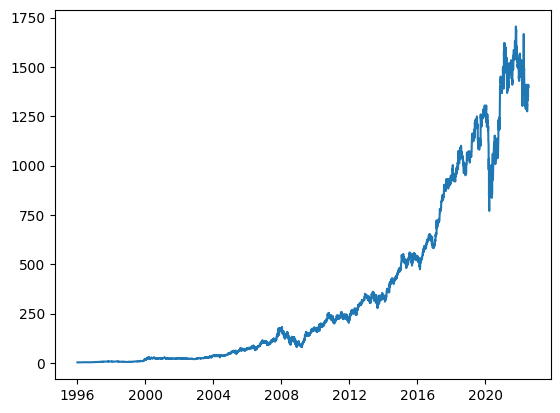

In [ ]:
plt.plot(df['Close'])
plt.show()
plt.plot(df['Open'])
plt.show()

#Use 3 features, Open, Close and diff


##Create Targets and scale the data

The target is going to be next day's closing price. The batches will be create accordingly.

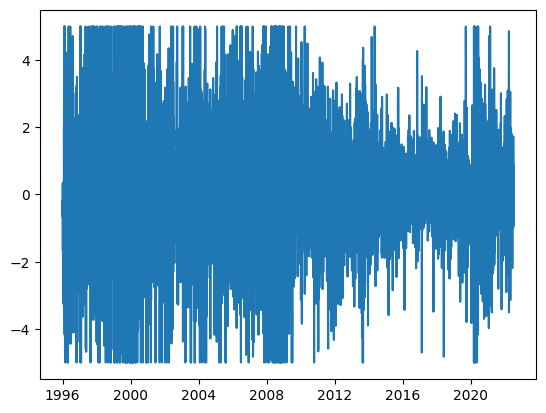

In [ ]:
df['diff'] = np.where(df['diff']>5, 5, df['diff'])
df['diff'] = np.where(df['diff']<-5, -5, df['diff'])
plt.plot(df['diff'])

In [ ]:
feature = np.array(df[['Open', 'Close', 'diff']])

print(feature.shape)

import math

training_data_len = math.ceil(feature.shape[0] *0.8)
print(training_data_len)
training_data = feature[:training_data_len]
testing_data = feature[training_data_len:]
print(training_data.shape, testing_data.shape)

(6676, 3)
5341
(5341, 3) (1335, 3)


In [ ]:
training_data[:32]

array([[ 3.02999997,  2.98000002, -1.65016346],
       [ 2.98000002,  2.9749999 , -0.16778907],
       [ 2.9749999 ,  2.9849999 ,  0.33613414],
       [ 2.9849999 ,  2.96499991, -0.67001613],
       [ 2.96499991,  2.96000004, -0.16862989],
       [ 2.96000004,  2.92499995, -1.18243532],
       [ 2.92499995,  2.82999992, -3.24786428],
       [ 2.82999992,  2.83999991,  0.35335656],
       [ 2.83999991,  2.82999992, -0.35211235],
       [ 2.82999992,  2.82500005, -0.17667407],
       [ 2.82500005,  2.78999996, -1.23894107],
       [ 2.78999996,  2.74000001, -1.79211301],
       [ 2.74000001,  2.65499997, -3.10219116],
       [ 2.65499997,  2.6400001 , -0.56496673],
       [ 2.6400001 ,  2.55500007, -3.21969829],
       [ 2.55500007,  2.54500008, -0.39138905],
       [ 2.54500008,  2.52999997, -0.58939507],
       [ 2.52999997,  2.46499991, -2.56917225],
       [ 2.46499991,  2.43499994, -1.21703742],
       [ 2.43499994,  2.43499994,  0.        ],
       [ 2.43499994,  2.4849999 ,  2.053

In [ ]:
batches_training = []
targets_training = []
diff_batches_training = []

for i in range(30,len(training_data)):
    buffer_array = list(training_data[i-30:i,:-1])
    targets_training.append(training_data[i][0])
    batches_training.append(buffer_array)
    diff_batches_training.append(list(training_data[i-30:i, -1]))

print(np.array(batches_training).shape, np.array(targets_training).shape, np.array(diff_batches_training).shape)

(5311, 30, 2) (5311,) (5311, 30)


In [ ]:
#Define batch scaling function
scaled_training_data = []
scaled_training_targets = []
scaled_diff_data = []

def scale(x, buffer_target):
  seq_x = np.array(x)
  max_x = np.amax(seq_x)
  min_x = np.amin(seq_x)
  new_seq = []
  for j in seq_x:
    buffer_seq = []
    for k in j:
      new_k = (k-min_x)/(max_x-min_x)
      buffer_seq.append(new_k)
    new_seq.append(buffer_seq)
  scaled_target = (buffer_target-min_x)/(max_x-min_x)
  return new_seq, scaled_target

def scale_vol(x):
  return x

for i in range(0, len(batches_training)):
  seq = batches_training[i]
  buffer_target = targets_training[i]
  diff_seq = diff_batches_training[i]
  new_seq, scaled_target = scale(seq, buffer_target)
  new_vol_seq = scale_vol(diff_seq)
  scaled_training_data.append(new_seq)
  scaled_training_targets.append(scaled_target)
  scaled_diff_data.append(diff_seq)



print(np.array(scaled_training_data).shape, np.array(scaled_training_targets).shape, np.array(scaled_diff_data).shape)

(5311, 30, 2) (5311,) (5311, 30)


In [ ]:
x_train = []
for i in range(0, len(scaled_training_data)):
  seq = list(scaled_training_data[i])
  vol_seq = list(scaled_diff_data[i])
  buffer_arr = []
  for j in range(0, len(seq)):
    buffer_seq = list(seq[j])
    buffer_seq.append(vol_seq[j])
    buffer_arr.append(buffer_seq)
  x_train.append(buffer_arr)

x_train = np.array(x_train)
y_train = np.array(scaled_training_targets)
print(x_train.shape, y_train.shape)

(5311, 30, 3) (5311,)


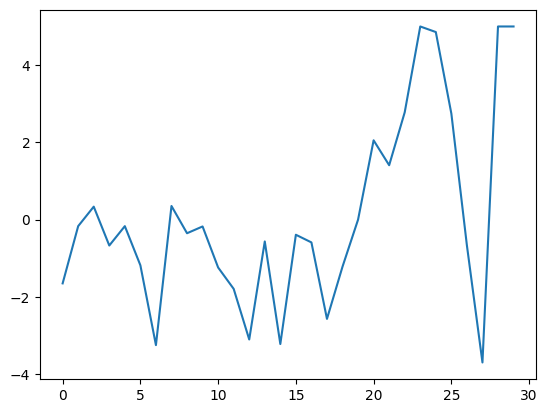

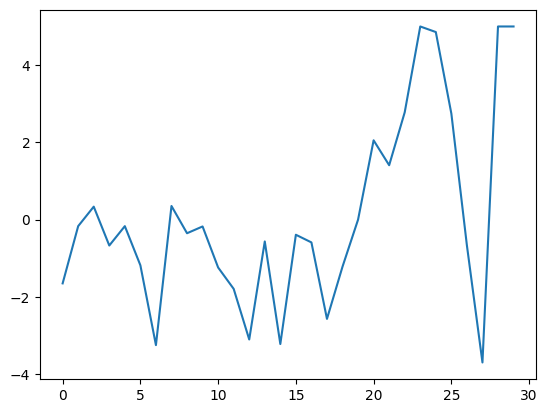

In [ ]:
plt.plot(pd.DataFrame(diff_batches_training[0]))
plt.show()
plt.plot(pd.DataFrame(scaled_diff_data[0]))
plt.show()

##Model Architecture

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
## epochs = 9
history = model.fit(x_train, y_train, batch_size=256, epochs=40, validation_split=0.2)

Epoch 1/40
17/17 [==============================] - 16s 359ms/step - loss: 0.0989 - val_loss: 0.0477
Epoch 2/40
17/17 [==============================] - 4s 228ms/step - loss: 0.0426 - val_loss: 0.0375
Epoch 3/40
17/17 [==============================] - 6s 351ms/step - loss: 0.0350 - val_loss: 0.0291
Epoch 4/40
17/17 [==============================] - 4s 257ms/step - loss: 0.0301 - val_loss: 0.0248
Epoch 5/40
17/17 [==============================] - 3s 190ms/step - loss: 0.0265 - val_loss: 0.0211
Epoch 6/40
17/17 [==============================] - 5s 278ms/step - loss: 0.0240 - val_loss: 0.0194
Epoch 7/40
17/17 [==============================] - 3s 185ms/step - loss: 0.0225 - val_loss: 0.0176
Epoch 8/40
17/17 [==============================] - 2s 109ms/step - loss: 0.0210 - val_loss: 0.0168
Epoch 9/40
17/17 [==============================] - 3s 158ms/step - loss: 0.0198 - val_loss: 0.0154
Epoch 10/40
17/17 [==============================] - 2s 145ms/step - loss: 0.0185 - val_loss: 0.015

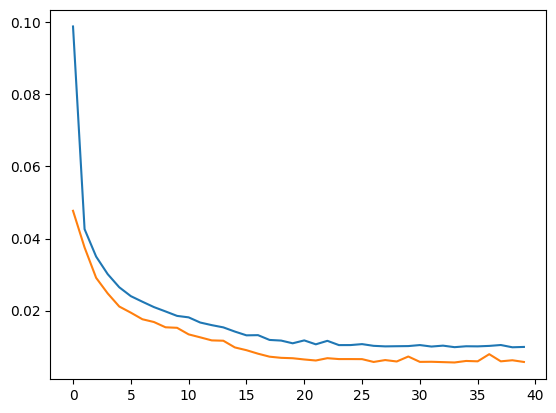

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

##Creating testing batches

In [ ]:
batches_testing = []
targets_testing = []
vol_batches_testing = []

for i in range(30,len(testing_data)):
    buffer_array = list(testing_data[i-30:i,:-1])
    targets_testing.append(testing_data[i][0])
    batches_testing.append(buffer_array)
    vol_batches_testing.append(list(testing_data[i-30:i, -1]))

print(np.array(batches_testing).shape, np.array(targets_testing).shape, np.array(vol_batches_testing).shape)


(1305, 30, 2) (1305,) (1305, 30)


In [ ]:
#Define batch scaling function
scaled_testing_data = []
scaled_testing_targets = []
scaled_testing_volume_data = []

scaling_dict = {}
def inverse_scale_data(x, min_x, max_x):
  orig_seq = []
  for j in x:
    buffer_array = []
    for k in j:
      orig_k = k*(max_x-min_x) + min_x
      buffer_array.append(orig_k)
    orig_seq.append(buffer_array)
  return orig_seq

def inverse_scale_target(x, min_x, max_x):
  orig_x = x*(max_x-min_x) + min_x
  return orig_x

def scale_vol(x):
  return x

def scale(x, buffer_target,i):
  seq_x = np.array(x)
  max_x = np.amax(seq_x)
  min_x = np.amin(seq_x)
  scaling_dict[i] = (min_x, max_x)
  new_seq = []
  for j in seq_x:
    buffer_seq = []
    for k in j:
      new_k = (k-min_x)/(max_x-min_x)
      buffer_seq.append(new_k)
    new_seq.append(buffer_seq)
  scaled_target = (buffer_target-min_x)/(max_x-min_x)
  return new_seq, scaled_target


for i in range(0, len(batches_testing)):
  seq = batches_testing[i]
  buffer_target = targets_testing[i]
  vol_seq = vol_batches_testing[i]
  new_vol_seq = scale_vol(vol_seq)
  new_seq, scaled_target = scale(seq, buffer_target, i)
  scaled_testing_data.append(new_seq)
  scaled_testing_targets.append(scaled_target)
  scaled_testing_volume_data.append(new_vol_seq)

print(np.array(scaled_testing_data).shape, np.array(scaled_testing_targets).shape, np.array(scaled_testing_volume_data).shape)

(1305, 30, 2) (1305,) (1305, 30)


In [ ]:
len(scaling_dict.keys())

1305

In [ ]:
x_test = []
for i in range(0, len(scaled_testing_data)):
  seq = list(scaled_testing_data[i])
  vol_seq = list(scaled_testing_volume_data[i])
  buffer_arr = []
  for j in range(0, len(seq)):
    buffer_seq = list(seq[j])
    buffer_seq.append(vol_seq[j])
    buffer_arr.append(buffer_seq)
  x_test.append(buffer_arr)

x_test = np.array(x_test)
y_test = np.array(scaled_testing_targets)
print(x_test.shape, y_test.shape)

(1305, 30, 3) (1305,)


##Testing

In [ ]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 0s 10ms/step - loss: 0.0072


0.00719978054985404

In [ ]:
prediction_list = model.predict(x_test)

41/41 [==============================] - 1s 9ms/step


In [ ]:
transformed_prediction_list = []

for i in range(0,len(prediction_list)):
    dict_values = list(scaling_dict[i])
    or_seq = inverse_scale_target(prediction_list[i], dict_values[0], dict_values[1])
    transformed_prediction_list.append(or_seq)

1305 1305


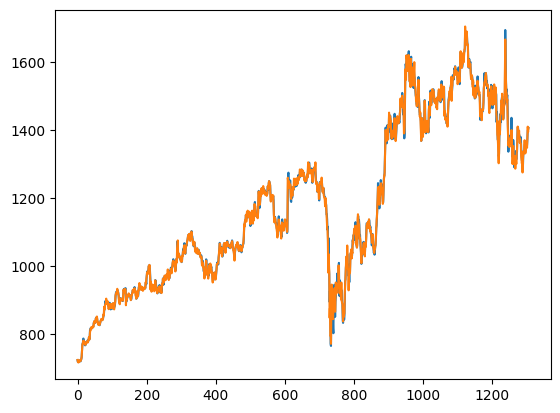

In [ ]:
print(len(transformed_prediction_list), len(testing_data[30:]))
plt.plot(transformed_prediction_list)
plt.plot(pd.DataFrame(testing_data[30:])[0])

In [ ]:
transformed_prediction_list = np.array(transformed_prediction_list)
testing_data_np = np.array(pd.DataFrame(testing_data[30:])[0])

print(transformed_prediction_list.shape, testing_data_np.shape)
error = 0
for i in range(0,len(testing_data_np)):
  buffer_error = math.sqrt((transformed_prediction_list[i] - testing_data_np[i])*(transformed_prediction_list[i] - testing_data_np[i]))
  error += buffer_error

base_stock_rmse = error/len(testing_data_np)
print("Final rmse: ", error/len(testing_data_np))

(1305, 1) (1305,)
Final rmse:  7.1118593440840305


##Check how accurate regression is

In [ ]:
preds, actual_close = pd.DataFrame(np.array(transformed_prediction_list)), pd.DataFrame(np.array(testing_data[30:]))
dataframe = pd.concat([preds, actual_close], axis=1)
dataframe.columns = ['preds', 'actual open', 'actual close', 'difference']
dataframe

,preds,actual open,actual close,difference
0,722.453735,723.000000,716.599976,-0.885204
1,717.440857,717.625000,716.174988,-0.202057
2,716.529236,715.750000,719.250000,0.488998
3,719.055115,715.525024,719.424988,0.545049
4,719.358765,721.500000,717.075012,-0.613304
...,...,...,...,...
1300,1354.904175,1348.000000,1371.250000,1.724777
1301,1373.143799,1380.000000,1395.800049,1.144931
1302,1398.660278,1410.000000,1397.099976,-0.914895
1303,1401.758789,1394.000000,1406.150024,0.871594


In [ ]:
fp = 0
fn = 0
tn = 0
tp = 0

for i in range(0, dataframe.shape[0]-1):
    if dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        tp += 1
    elif dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        fp += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        tn += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        fn += 1

base_stock_matrix = (tp,fp,fn, tn)
base_stock_accuracy = tp /(tp +fp )

In [ ]:
print(tp,fp,fn, tn)

619 426 137 99


In [ ]:
tp /(tp +fp )

0.5923444976076555

##Testing on test_stock

In [ ]:
df_IGL = pdr.get_data_yahoo(test_stock, start="1980-02-01", end="2022-07-13")

df_IGL['diff'] = (df_IGL['Close'] - df_IGL['Open'])*100/df_IGL['Open']
df_IGL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2002-07-01,25.418180,25.818180,24.818180,25.127272,18.183350,2047540,-1.144491
2002-07-02,25.454544,27.636362,25.236362,26.745455,19.354347,5546354,5.071435
2002-07-03,26.727272,28.181818,26.645454,28.090908,20.327982,5745267,5.102040
2002-07-04,28.181818,28.799999,27.036364,27.390909,19.821430,3896601,-2.806451
2002-07-05,27.090908,27.863636,26.945454,27.672728,20.025366,3261038,2.147656
...,...,...,...,...,...,...,...
2022-07-06,723.000000,731.900024,722.000000,725.950012,721.619568,12163533,0.408024
2022-07-07,735.950012,744.000000,733.000000,742.000000,737.573853,10374018,0.822065
2022-07-08,751.299988,757.500000,744.549988,755.700012,751.192139,9797700,0.585655


In [ ]:
testing_data = np.array(df_IGL[['Open', 'Close', 'diff']])

import math

print(testing_data.shape)

(4978, 3)


In [ ]:
batches_testing = []
targets_testing = []
vol_batches_testing = []

for i in range(30,len(testing_data)):
    buffer_array = list(testing_data[i-30:i,:-1])
    targets_testing.append(testing_data[i][0])
    batches_testing.append(buffer_array)
    vol_batches_testing.append(list(testing_data[i-30:i, -1]))

print(np.array(batches_testing).shape, np.array(targets_testing).shape, np.array(vol_batches_testing).shape)


(4948, 30, 2) (4948,) (4948, 30)


In [ ]:
#Define batch scaling function
scaled_testing_data = []
scaled_testing_targets = []
scaled_testing_volume_data = []

scaling_dict = {}
def inverse_scale_data(x, min_x, max_x):
  orig_seq = []
  for j in x:
    buffer_array = []
    for k in j:
      orig_k = k*(max_x-min_x) + min_x
      buffer_array.append(orig_k)
    orig_seq.append(buffer_array)
  return orig_seq

def inverse_scale_target(x, min_x, max_x):
  orig_x = x*(max_x-min_x) + min_x
  return orig_x

def scale_vol(x):
  return x

def scale(x, buffer_target,i):
  seq_x = np.array(x)
  max_x = np.amax(seq_x)
  min_x = np.amin(seq_x)
  scaling_dict[i] = (min_x, max_x)
  new_seq = []
  for j in seq_x:
    buffer_seq = []
    for k in j:
      new_k = (k-min_x)/(max_x-min_x)
      buffer_seq.append(new_k)
    new_seq.append(buffer_seq)
  scaled_target = (buffer_target-min_x)/(max_x-min_x)
  return new_seq, scaled_target


for i in range(0, len(batches_testing)):
  seq = batches_testing[i]
  buffer_target = targets_testing[i]
  vol_seq = vol_batches_testing[i]
  new_vol_seq = scale_vol(vol_seq)
  new_seq, scaled_target = scale(seq, buffer_target, i)
  scaled_testing_data.append(new_seq)
  scaled_testing_targets.append(scaled_target)
  scaled_testing_volume_data.append(new_vol_seq)

print(np.array(scaled_testing_data).shape, np.array(scaled_testing_targets).shape, np.array(scaled_testing_volume_data).shape)

(4948, 30, 2) (4948,) (4948, 30)


In [ ]:
x_test = []
for i in range(0, len(scaled_testing_data)):
  seq = list(scaled_testing_data[i])
  vol_seq = list(scaled_testing_volume_data[i])
  buffer_arr = []
  for j in range(0, len(seq)):
    buffer_seq = list(seq[j])
    buffer_seq.append(vol_seq[j])
    buffer_arr.append(buffer_seq)
  x_test.append(buffer_arr)

x_test = np.array(x_test)
y_test = np.array(scaled_testing_targets)
print(x_train.shape, y_train.shape)

(5311, 30, 3) (5311,)


In [ ]:
model.evaluate(x_train, y_train)

166/166 [==============================] - 2s 10ms/step - loss: 0.0090


0.008971231058239937

In [ ]:
prediction_list = model.predict(x_test)


155/155 [==============================] - 2s 10ms/step


In [ ]:
transformed_prediction_list = []

for i in range(0,len(prediction_list)):
    dict_values = list(scaling_dict[i])
    or_seq = inverse_scale_target(prediction_list[i], dict_values[0], dict_values[1])
    transformed_prediction_list.append(or_seq)

4948 4948


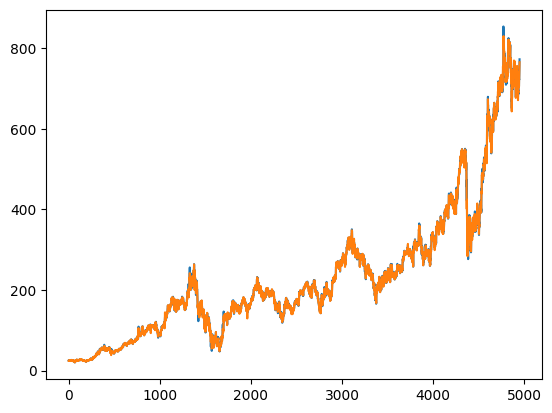

In [ ]:
print(len(transformed_prediction_list), len(testing_data[30:]))
plt.plot(transformed_prediction_list)
plt.plot(pd.DataFrame(testing_data[30:])[0])

In [ ]:
transformed_prediction_list = np.array(transformed_prediction_list)
testing_data_np = np.array(pd.DataFrame(testing_data[30:])[0])

print(transformed_prediction_list.shape, testing_data_np.shape)
error = 0
for i in range(0,len(testing_data_np)):
  buffer_error = math.sqrt((transformed_prediction_list[i] - testing_data_np[i])*(transformed_prediction_list[i] - testing_data_np[i]))
  error += buffer_error

test_stock_rmse = error/len(testing_data_np)
print("Final rmse: ", error/len(testing_data_np))

(4948, 1) (4948,)
Final rmse:  2.0341631895770216


##Check how accurate regression is

In [ ]:
preds, actual_close = pd.DataFrame(np.array(transformed_prediction_list)), pd.DataFrame(np.array(testing_data[30:]))
dataframe = pd.concat([preds, actual_close], axis=1)
dataframe.columns = ['preds', 'actual open', 'actual close', 'difference']
dataframe

,preds,actual open,actual close,difference
0,24.742418,24.545454,24.427273,-0.481479
1,24.505146,24.545454,24.418180,-0.518522
2,24.470512,24.472727,24.054544,-1.708769
3,24.097572,24.054544,24.054544,0.000000
4,24.104345,24.090908,24.400000,1.283022
...,...,...,...,...
4943,721.891357,723.000000,725.950012,0.408024
4944,728.174805,735.950012,742.000000,0.822065
4945,745.062378,751.299988,755.700012,0.585655
4946,759.117249,755.000000,769.500000,1.920530


In [ ]:
fp = 0
fn = 0
tn = 0
tp = 0

for i in range(0, dataframe.shape[0]-1):
    if dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        tp += 1
    elif dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        fp += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        tn += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        fn += 1

test_stock_matrix = (tp,fp,fn, tn)
test_stock_accuracy = tp /(tp +fp )

In [ ]:
print(tp,fp,fn, tn)

2493 1579 447 287


In [ ]:
tp /(tp +fp )

0.6122298624754421

#Results of above

In [ ]:
print("base stock rmse: ", base_stock_rmse)
print("base stock matrix: ", base_stock_matrix)
print("test stock rmse: ", test_stock_rmse)
print("test stock accuracy: ", test_stock_accuracy)
print("test stock matrix: ", test_stock_matrix)

base stock rmse:  7.1118593440840305
base stock matrix:  (619, 426, 137, 99)
test stock rmse:  2.0341631895770216
test stock accuracy:  0.6122298624754421
test stock matrix:  (2493, 1579, 447, 287)


#Use 4 features, Open, Close and 2 EMAS


##Create Targets and scale the data

The target is going to be next day's closing price. The batches will be create accordingly.

In [ ]:
df['EWMA10'] = df['Close'].ewm(span=10).mean()
df['EWMA5'] = df['Close'].ewm(span=5).mean()

In [ ]:
feature = np.array(df[['Open', 'Close', 'EWMA10', 'EWMA5']])

print(feature.shape)

import math

training_data_len = math.ceil(feature.shape[0] *0.8)
print(training_data_len)
training_data = feature[:training_data_len]
testing_data = feature[training_data_len:]
print(training_data.shape, testing_data.shape)

(6676, 4)
5341
(5341, 4) (1335, 4)


In [ ]:
training_data[:32]

array([[3.02999997, 2.98000002, 2.98000002, 2.98000002],
       [2.98000002, 2.9749999 , 2.97724996, 2.97699995],
       [2.9749999 , 2.9849999 , 2.98036538, 2.9807894 ],
       [2.9849999 , 2.96499991, 2.97530314, 2.97423069],
       [2.96499991, 2.96000004, 2.97091004, 2.96876774],
       [2.96000004, 2.92499995, 2.9589856 , 2.9527744 ],
       [2.92499995, 2.82999992, 2.92790524, 2.90930544],
       [2.82999992, 2.83999991, 2.90790635, 2.8852656 ],
       [2.83999991, 2.82999992, 2.89095664, 2.86635171],
       [2.82999992, 2.82500005, 2.87710205, 2.85232457],
       [2.82500005, 2.78999996, 2.85930818, 2.83130671],
       [2.78999996, 2.74000001, 2.83547063, 2.80063475],
       [2.74000001, 2.65499997, 2.80004979, 2.7518391 ],
       [2.65499997, 2.6400001 , 2.76908444, 2.71443129],
       [2.6400001 , 2.55500007, 2.72814201, 2.66116591],
       [2.55500007, 2.54500008, 2.69344421, 2.62238492],
       [2.54500008, 2.52999997, 2.66271311, 2.59155865],
       [2.52999997, 2.46499991,

In [ ]:
batches_training = []
targets_training = []

for i in range(30,len(training_data)):
    buffer_array = list(training_data[i-30:i,:])
    targets_training.append(training_data[i][0])
    batches_training.append(buffer_array)

print(np.array(batches_training).shape, np.array(targets_training).shape)

(5311, 30, 4) (5311,)


In [ ]:
#Define batch scaling function
scaled_training_data = []
scaled_training_targets = []

def scale(x, buffer_target):
  seq_x = np.array(x)
  max_x = np.amax(seq_x)
  min_x = np.amin(seq_x)
  new_seq = []
  for j in seq_x:
    buffer_seq = []
    for k in j:
      new_k = (k-min_x)/(max_x-min_x)
      buffer_seq.append(new_k)
    new_seq.append(buffer_seq)
  scaled_target = (buffer_target-min_x)/(max_x-min_x)
  return new_seq, scaled_target

def scale_vol(x):
  return x

for i in range(0, len(batches_training)):
  seq = batches_training[i]
  buffer_target = targets_training[i]
  new_seq, scaled_target = scale(seq, buffer_target)
  scaled_training_data.append(new_seq)
  scaled_training_targets.append(scaled_target)


print(np.array(scaled_training_data).shape, np.array(scaled_training_targets).shape)

(5311, 30, 4) (5311,)


In [ ]:
x_train = np.array(scaled_training_data)
y_train = np.array(scaled_training_targets)

x_train.shape, y_train.shape

((5311, 30, 4), (5311,))

In [ ]:
# np.array(scaled_data).shape

# x_train = []
# y_train = []
# for i in range(0, len(scaled_data)):
#     seq = scaled_data[i]
#     x_train.append(seq[0:-1])
#     y_train.append(seq[-1])

# x_train, y_train = np.array(x_train), np.array(y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# print(x_train.shape, y_train.shape)

##Model Architecture

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
## epochs = 9
history = model.fit(x_train, y_train, batch_size=256, epochs=40, validation_split=0.2)

Epoch 1/40
17/17 [==============================] - 8s 196ms/step - loss: 0.1143 - val_loss: 0.0797
Epoch 2/40
17/17 [==============================] - 3s 148ms/step - loss: 0.0666 - val_loss: 0.0569
Epoch 3/40
17/17 [==============================] - 2s 113ms/step - loss: 0.0532 - val_loss: 0.0418
Epoch 4/40
17/17 [==============================] - 2s 113ms/step - loss: 0.0444 - val_loss: 0.0347
Epoch 5/40
17/17 [==============================] - 2s 114ms/step - loss: 0.0400 - val_loss: 0.0313
Epoch 6/40
17/17 [==============================] - 2s 112ms/step - loss: 0.0361 - val_loss: 0.0280
Epoch 7/40
17/17 [==============================] - 3s 154ms/step - loss: 0.0319 - val_loss: 0.0235
Epoch 8/40
17/17 [==============================] - 3s 155ms/step - loss: 0.0272 - val_loss: 0.0191
Epoch 9/40
17/17 [==============================] - 2s 114ms/step - loss: 0.0235 - val_loss: 0.0155
Epoch 10/40
17/17 [==============================] - 2s 115ms/step - loss: 0.0194 - val_loss: 0.0126

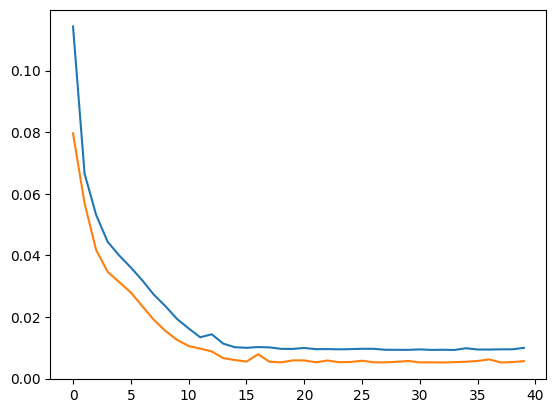

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

##Creating testing batches

In [ ]:
batches_testing = []
targets_testing = []

for i in range(30,len(testing_data)):
    buffer_array = list(testing_data[i-30:i,:])
    targets_testing.append(testing_data[i][0])
    batches_testing.append(buffer_array)

print(np.array(batches_testing).shape, np.array(targets_testing).shape)


(1305, 30, 4) (1305,)


In [ ]:
#Define batch scaling function
scaled_testing_data = []
scaled_testing_targets = []

scaling_dict = {}
def inverse_scale_data(x, min_x, max_x):
  orig_seq = []
  for j in x:
    buffer_array = []
    for k in j:
      orig_k = k*(max_x-min_x) + min_x
      buffer_array.append(orig_k)
    orig_seq.append(buffer_array)
  return orig_seq

def inverse_scale_target(x, min_x, max_x):
  orig_x = x*(max_x-min_x) + min_x
  return orig_x

def scale(x, buffer_target,i):
  seq_x = np.array(x)
  max_x = np.amax(seq_x)
  min_x = np.amin(seq_x)
  scaling_dict[i] = (min_x, max_x)
  new_seq = []
  for j in seq_x:
    buffer_seq = []
    for k in j:
      new_k = (k-min_x)/(max_x-min_x)
      buffer_seq.append(new_k)
    new_seq.append(buffer_seq)
  scaled_target = (buffer_target-min_x)/(max_x-min_x)
  return new_seq, scaled_target


for i in range(0, len(batches_testing)):
  seq = batches_testing[i]
  buffer_target = targets_testing[i]
  new_seq, scaled_target = scale(seq, buffer_target, i)
  scaled_testing_data.append(new_seq)
  scaled_testing_targets.append(scaled_target)

print(np.array(scaled_testing_data).shape, np.array(scaled_testing_targets).shape)

(1305, 30, 4) (1305,)


In [ ]:
len(scaling_dict.keys())

1305

In [ ]:
x_test = np.array(scaled_testing_data)
y_test = np.array(scaled_testing_targets)
print(x_test.shape, y_test.shape)

(1305, 30, 4) (1305,)


##Testing

In [ ]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 0s 10ms/step - loss: 0.0069


0.006870239973068237

In [ ]:
prediction_list = model.predict(x_test)

41/41 [==============================] - 1s 10ms/step


In [ ]:
transformed_prediction_list = []

for i in range(0,len(prediction_list)):
    dict_values = list(scaling_dict[i])
    or_seq = inverse_scale_target(prediction_list[i], dict_values[0], dict_values[1])
    transformed_prediction_list.append(or_seq)

1305 1305


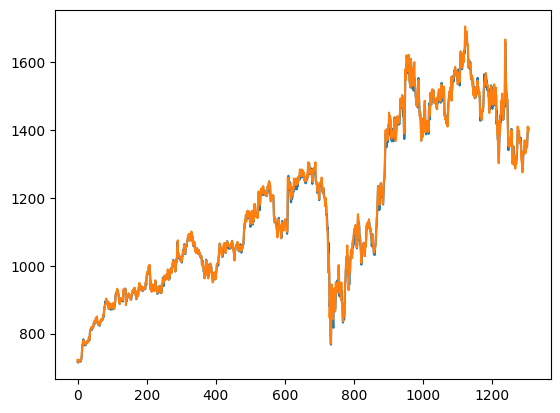

In [ ]:
print(len(transformed_prediction_list), len(testing_data[30:]))
plt.plot(transformed_prediction_list)
plt.plot(pd.DataFrame(testing_data[30:])[0])

In [ ]:
transformed_prediction_list = np.array(transformed_prediction_list)
testing_data_np = np.array(pd.DataFrame(testing_data[30:])[0])

print(transformed_prediction_list.shape, testing_data_np.shape)
error = 0
for i in range(0,len(testing_data_np)):
  buffer_error = math.sqrt((transformed_prediction_list[i] - testing_data_np[i])*(transformed_prediction_list[i] - testing_data_np[i]))
  error += buffer_error

base_stock_rmse = error/len(testing_data_np)
print("Final rmse: ", error/len(testing_data_np))

(1305, 1) (1305,)
Final rmse:  7.330701900648866


##Check how accurate regression is

In [ ]:
preds, actual_close = pd.DataFrame(np.array(transformed_prediction_list)), pd.DataFrame(np.array(testing_data[30:]))
dataframe = pd.concat([preds, actual_close], axis=1)
dataframe.columns = ['preds', 'actual open', 'actual close', 'EWMA10', 'EWMA5']
dataframe

,preds,actual open,actual close,EWMA10,EWMA5
0,717.311707,723.000000,716.599976,716.012691,718.683106
1,715.092773,717.625000,716.174988,716.042199,717.847066
2,715.145996,715.750000,719.250000,716.625436,718.314711
3,718.401184,715.525024,719.424988,717.134445,718.684803
4,718.288452,721.500000,717.075012,717.123639,718.148206
...,...,...,...,...,...
1300,1351.774414,1348.000000,1371.250000,1351.399945,1357.926236
1301,1370.953125,1380.000000,1395.800049,1359.472691,1370.550841
1302,1394.532349,1410.000000,1397.099976,1366.314015,1379.400552
1303,1394.464722,1394.000000,1406.150024,1373.556926,1388.317043


In [ ]:
fp = 0
fn = 0
tn = 0
tp = 0

for i in range(0, dataframe.shape[0]-1):
    if dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        tp += 1
    elif dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        fp += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        tn += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        fn += 1

In [ ]:
base_stock_matrix = (tp,fp,fn, tn)

In [ ]:
base_stock_accuracy = tp /(tp +fp )

##Testing on POWERGRID

In [ ]:
df_IGL = pdr.get_data_yahoo("ICICIBANK.NS", start="1980-02-01", end="2022-07-13")

df_IGL['EWMA10'] = df_IGL['Close'].ewm(span=10).mean()
df_IGL['EWMA5'] = df_IGL['Close'].ewm(span=5).mean()
df_IGL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EWMA10,EWMA5
Date,,,,,,,,
2002-07-01,25.418180,25.818180,24.818180,25.127272,18.183352,2047540,25.127272,25.127272
2002-07-02,25.454544,27.636362,25.236362,26.745455,19.354347,5546354,26.017272,26.098182
2002-07-03,26.727272,28.181818,26.645454,28.090908,20.327986,5745267,26.850860,27.042105
2002-07-04,28.181818,28.799999,27.036364,27.390909,19.821436,3896601,27.028782,27.186993
2002-07-05,27.090908,27.863636,26.945454,27.672728,20.025372,3261038,27.213641,27.373460
...,...,...,...,...,...,...,...,...
2022-07-06,723.000000,731.900024,722.000000,725.950012,721.619568,12163533,712.571268,717.561514
2022-07-07,735.950012,744.000000,733.000000,742.000000,737.573853,10374018,717.921946,725.707676
2022-07-08,751.299988,757.500000,744.549988,755.700012,751.192139,9797700,724.790685,735.705121


In [ ]:
testing_data = np.array(df_IGL[['Open', 'Close', 'EWMA10', 'EWMA5']])

import math

print(testing_data.shape)

(4978, 4)


In [ ]:
batches_testing = []
targets_testing = []

for i in range(30,len(testing_data)):
    buffer_array = list(testing_data[i-30:i,:])
    targets_testing.append(testing_data[i][0])
    batches_testing.append(buffer_array)

print(np.array(batches_testing).shape, np.array(targets_testing).shape)


(4948, 30, 4) (4948,)


In [ ]:
#Define batch scaling function
scaled_testing_data = []
scaled_testing_targets = []
scaled_testing_volume_data = []

scaling_dict = {}
def inverse_scale_data(x, min_x, max_x):
  orig_seq = []
  for j in x:
    buffer_array = []
    for k in j:
      orig_k = k*(max_x-min_x) + min_x
      buffer_array.append(orig_k)
    orig_seq.append(buffer_array)
  return orig_seq

def inverse_scale_target(x, min_x, max_x):
  orig_x = x*(max_x-min_x) + min_x
  return orig_x

def scale(x, buffer_target,i):
  seq_x = np.array(x)
  max_x = np.amax(seq_x)
  min_x = np.amin(seq_x)
  scaling_dict[i] = (min_x, max_x)
  new_seq = []
  for j in seq_x:
    buffer_seq = []
    for k in j:
      new_k = (k-min_x)/(max_x-min_x)
      buffer_seq.append(new_k)
    new_seq.append(buffer_seq)
  scaled_target = (buffer_target-min_x)/(max_x-min_x)
  return new_seq, scaled_target


for i in range(0, len(batches_testing)):
  seq = batches_testing[i]
  buffer_target = targets_testing[i]
  new_seq, scaled_target = scale(seq, buffer_target, i)
  scaled_testing_data.append(new_seq)
  scaled_testing_targets.append(scaled_target)

print(np.array(scaled_testing_data).shape, np.array(scaled_testing_targets).shape)

(4948, 30, 4) (4948,)


In [ ]:
x_test = np.array(scaled_testing_data)
y_test = np.array(scaled_testing_targets)
print(x_test.shape, y_test.shape)

(4948, 30, 4) (4948,)


In [ ]:
model.evaluate(x_test, y_test)

155/155 [==============================] - 2s 10ms/step - loss: 0.0073


0.00732417032122612

In [ ]:
prediction_list = model.predict(x_test)

155/155 [==============================] - 2s 14ms/step


In [ ]:
transformed_prediction_list = []

for i in range(0,len(prediction_list)):
    dict_values = list(scaling_dict[i])
    or_seq = inverse_scale_target(prediction_list[i], dict_values[0], dict_values[1])
    transformed_prediction_list.append(or_seq)

4948 4948


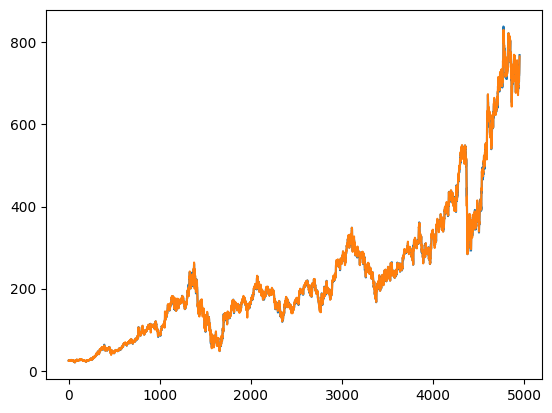

In [ ]:
print(len(transformed_prediction_list), len(testing_data[30:]))
plt.plot(transformed_prediction_list)
plt.plot(pd.DataFrame(testing_data[30:])[0])

In [ ]:
transformed_prediction_list = np.array(transformed_prediction_list)
testing_data_np = np.array(pd.DataFrame(testing_data[30:])[0])

print(transformed_prediction_list.shape, testing_data_np.shape)
error = 0
for i in range(0,len(testing_data_np)):
  buffer_error = math.sqrt((transformed_prediction_list[i] - testing_data_np[i])*(transformed_prediction_list[i] - testing_data_np[i]))
  error += buffer_error

test_stock_rmse = error/len(testing_data_np)
print("Final rmse: ", error/len(testing_data_np))

(4948, 1) (4948,)
Final rmse:  2.0468224732388585


##Check how accurate regression is

In [ ]:
preds, actual_close = pd.DataFrame(np.array(transformed_prediction_list)), pd.DataFrame(np.array(testing_data[30:]))
dataframe = pd.concat([preds, actual_close], axis=1)
dataframe.columns = ['preds', 'actual open', 'actual close', 'EWMA10', 'EWMA5']
dataframe

,preds,actual open,actual close,EWMA10,EWMA5
0,24.696476,24.545454,24.427273,25.007645,24.719660
1,24.478682,24.545454,24.418180,24.900295,24.619166
2,24.458527,24.472727,24.054544,24.746317,24.430959
3,24.127758,24.054544,24.054544,24.620403,24.305487
4,24.088762,24.090908,24.400000,24.580294,24.336991
...,...,...,...,...,...
4943,719.385742,723.000000,725.950012,712.571268,717.561514
4944,726.235107,735.950012,742.000000,717.921946,725.707676
4945,742.348389,751.299988,755.700012,724.790685,735.705121
4946,755.342590,755.000000,769.500000,732.919652,746.970081


In [ ]:
fp = 0
fn = 0
tn = 0
tp = 0

for i in range(0, dataframe.shape[0]-1):
    if dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        tp += 1
    elif dataframe.iloc[i+1][0] > dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        fp += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]<dataframe.iloc[i][2]:
        tn += 1
    elif dataframe.iloc[i+1][0] < dataframe.iloc[i][2] and dataframe.iloc[i+1][1]>dataframe.iloc[i][2]:
        fn += 1

In [ ]:
test_stock_matrix = (tp,fp,fn, tn)

In [ ]:
test_stock_accuracy = tp /(tp +fp )

#Results of above

In [ ]:
print("base stock rmse: ", base_stock_rmse)
print("base stock matrix: ", base_stock_matrix)
print("test stock rmse: ", test_stock_rmse)
print("test stock accuracy: ", test_stock_accuracy)
print("test stock matrix: ", test_stock_matrix)

base stock rmse:  7.330701900648866
base stock matrix:  (216, 161, 540, 364)
test stock rmse:  2.0468224732388585
test stock accuracy:  0.6148693904889484
test stock matrix:  (918, 575, 2022, 1291)
